This script analyzes the burst statistics calculated by the "calculate_event_properties" function used for the NERC (see "NERC_data_complexity.ipynb") and the QDC (see "QDC_event_bursts_v1.ipynb") data

### Imports/Dependencies

In [1]:
import numpy as np
import pandas as pd
import glob
import os

import datetime
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import seaborn as sns



### Data location

In [2]:
nerc_data_directory = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/'
files_nerc = glob.glob( os.path.join(nerc_data_directory,'*.csv') )
files_nerc

['/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20150919.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20150317.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20151220.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20130531.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20210512.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20131002.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20170927.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/integrated_data/integrated_data_event_20150622.csv',
 '/Users/ryanmc/Documents/Conferences/Ja

In [3]:
qdc_directory = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/QDC_data/resampled/'
qdc_data_dir = qdc_directory
files_qdc = glob.glob( os.path.join(qdc_data_dir,'*.csv') )
files_qdc



['/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/QDC_data/resampled/Node_1_anon_gic_qdc_median_wdy10_wmin1800_fm3_wgic_resampled.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/QDC_data/resampled/Node_2_anon_gic_qdc_median_wdy10_wmin1800_fm3_wgic_resampled.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/QDC_data/resampled/Node_3_anon_gic_qdc_median_wdy10_wmin1800_fm3_wgic_resampled.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/QDC_data/resampled/Node_6_anon_gic_qdc_median_wdy10_wmin1800_fm3_wgic_resampled.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/QDC_data/resampled/Node_7_anon_gic_qdc_median_wdy10_wmin1800_fm3_wgic_resampled.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/QDC_data/resampled/Node_5_anon_gic_qdc_median_wdy10_wmin1800_fm3_wgic_resampled.csv',
 '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/QDC_data/resamp

In [ ]:
#unfinished
def run_events(files_nerc,files_QDC,threshold):
    print('\n\n\n WORKING ON POSITIVE NERC EVENTS')
    dir_base_NERC = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/burst_event_data/NERC/'+str(threshold)+'/positive'
    dir_base_QDC = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/burst_event_data/NERC/'+str(threshold)+'/positive'


### Read in the data

In [8]:

dir_base = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/burst_event_data/NERC/0.5/positive'
print('\n\n\n WORKING ON POSITIVE NERC EVENTS')

start_flag = 0

for f in files_nerc:
    print('working on event = {}'.format(f[f.find('event'):-4]))
    # get event stub
    ev = f[f.find('event'):-4]
    
    # AE stats
    df_AE_tmp = pd.read_csv( os.path.join(dir_base,ev+'AEevents.csv'),index_col=0)

    # IMF stats
    df_IMF_tmp = pd.read_csv( os.path.join(dir_base,ev+'IMFevents.csv'),index_col=0)

    # GIC stats
    df_GIC_tmp = pd.read_csv( os.path.join(dir_base,ev+'GICevents.csv'),index_col=0)
    
    if start_flag == 0:
        df_AE_total_NERC_positive = df_AE_tmp
        df_IMF_total_NERC_positive = df_IMF_tmp
        df_GIC_total_NERC_positive = df_GIC_tmp
        start_flag = 1
    else:
        
        df_AE_total_NERC_positive = pd.concat([df_AE_total_NERC_positive, df_AE_tmp], axis=0)
        df_IMF_total_NERC_positive = pd.concat([df_IMF_total_NERC_positive, df_IMF_tmp], axis=0)
        df_GIC_total_NERC_positive = pd.concat([df_GIC_total_NERC_positive, df_GIC_tmp], axis=0)

        
        
dir_base = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/burst_event_data/NERC/0.5/negative'
print('\n\n\n WORKING ON NEGATIVE NERC EVENTS')
start_flag = 0

for f in files_nerc:
    print('working on event = {}'.format(f[f.find('event'):-4]))
    # get event stub
    ev = f[f.find('event'):-4]
    
    # AE stats
    df_AE_tmp = pd.read_csv( os.path.join(dir_base,ev+'AEevents.csv'),index_col=0)

    # IMF stats
    df_IMF_tmp = pd.read_csv( os.path.join(dir_base,ev+'IMFevents.csv'),index_col=0)

    # GIC stats
    df_GIC_tmp = pd.read_csv( os.path.join(dir_base,ev+'GICevents.csv'),index_col=0)
    
    if start_flag == 0:
        df_AE_total_NERC_negative = df_AE_tmp
        df_IMF_total_NERC_negative = df_IMF_tmp
        df_GIC_total_NERC_negative = df_GIC_tmp
        start_flag = 1
    else:
        
        df_AE_total_NERC_negative = pd.concat([df_AE_total_NERC_negative, df_AE_tmp], axis=0)
        df_IMF_total_NERC_negative = pd.concat([df_IMF_total_NERC_negative, df_IMF_tmp], axis=0)
        df_GIC_total_NERC_negative = pd.concat([df_GIC_total_NERC_negative, df_GIC_tmp], axis=0)
    




 WORKING ON POSITIVE NERC EVENTS
working on event = event_20150919
working on event = event_20150317
working on event = event_20151220
working on event = event_20130531
working on event = event_20210512
working on event = event_20131002
working on event = event_20170927
working on event = event_20150622
working on event = event_20170527
working on event = event_20180825
working on event = event_20170907
working on event = event_20220409
working on event = event_20151006
working on event = event_20150911



 WORKING ON NEGATIVE NERC EVENTS
working on event = event_20150919
working on event = event_20150317
working on event = event_20151220
working on event = event_20130531
working on event = event_20210512
working on event = event_20131002
working on event = event_20170927
working on event = event_20150622
working on event = event_20170527
working on event = event_20180825
working on event = event_20170907
working on event = event_20220409
working on event = event_20151006
working on

In [9]:

dir_base = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/burst_event_data/QDC/0.5/positive'
print('\n\n\n WORKING ON POSITIVE QDC EVENTS')

start_flag = 0

for f in files_qdc:
    print('working on node = {}'.format(f[files_qdc[0].find('Node'):f.find('Node')+6].replace(" ", "").replace("_","")))
    # get event stub
    node = f[files_qdc[0].find('Node'):f.find('Node')+6].replace(" ", "").replace("_","")+'_'
    
    # AE stats
    df_AE_tmp = pd.read_csv( os.path.join(dir_base,node+'AEevents.csv'),index_col=0)

    # IMF stats
    df_IMF_tmp = pd.read_csv( os.path.join(dir_base,node+'IMFevents.csv'),index_col=0)

    # GIC stats
    df_GIC_tmp = pd.read_csv( os.path.join(dir_base,node+'GICevents.csv'),index_col=0)
    
    if start_flag == 0:
        df_AE_total_QDC_positive = df_AE_tmp
        df_IMF_total_QDC_positive = df_IMF_tmp
        df_GIC_total_QDC_positive = df_GIC_tmp
        start_flag = 1
    else:
        
        df_AE_total_QDC_positive = pd.concat([df_AE_total_QDC_positive, df_AE_tmp], axis=0)
        df_IMF_total_QDC_positive = pd.concat([df_IMF_total_QDC_positive, df_IMF_tmp], axis=0)
        df_GIC_total_QDC_positive = pd.concat([df_GIC_total_QDC_positive, df_GIC_tmp], axis=0)

        
        
dir_base = '/Users/ryanmc/Documents/Conferences/Jack_Eddy_Symposium_2022/dev/burst_event_data/QDC/0.5/negative'
print('\n\n\n WORKING ON NEGATIVE QDC EVENTS')
start_flag = 0

for f in files_qdc:
    print('working on node = {}'.format(f[files_qdc[0].find('Node'):f.find('Node')+6].replace(" ", "").replace("_","")))
    # get event stub
    node = f[files_qdc[0].find('Node'):f.find('Node')+6].replace(" ", "").replace("_","")+'_'
    
    # AE stats
    df_AE_tmp = pd.read_csv( os.path.join(dir_base,node+'AEevents.csv'),index_col=0)

    # IMF stats
    df_IMF_tmp = pd.read_csv( os.path.join(dir_base,node+'IMFevents.csv'),index_col=0)

    # GIC stats
    df_GIC_tmp = pd.read_csv( os.path.join(dir_base,node+'GICevents.csv'),index_col=0)

    if start_flag == 0:
        df_AE_total_QDC_negative = df_AE_tmp
        df_IMF_total_QDC_negative = df_IMF_tmp
        df_GIC_total_QDC_negative = df_GIC_tmp
        start_flag = 1
    else:
        
        df_AE_total_QDC_negative = pd.concat([df_AE_total_QDC_negative, df_AE_tmp], axis=0)
        df_IMF_total_QDC_negative = pd.concat([df_IMF_total_QDC_negative, df_IMF_tmp], axis=0)
        df_GIC_total_QDC_negative = pd.concat([df_GIC_total_QDC_negative, df_GIC_tmp], axis=0)
    




 WORKING ON POSITIVE QDC EVENTS
working on node = Node1
working on node = Node2
working on node = Node3
working on node = Node6
working on node = Node7
working on node = Node5
working on node = Node4



 WORKING ON NEGATIVE QDC EVENTS
working on node = Node1
working on node = Node2
working on node = Node3
working on node = Node6
working on node = Node7
working on node = Node5
working on node = Node4


In [10]:
# number of events
print('number of events for NERC positive = {}'.format(len(df_GIC_total_NERC_positive)))
print('number of events for NERC negative = {}'.format(len(df_GIC_total_NERC_negative)))
print('number of events for QDC positive = {}'.format(len(df_GIC_total_QDC_positive)))
print('number of events for QDC negative = {}'.format(len(df_GIC_total_QDC_negative)))


number of events for NERC positive = 65532
number of events for NERC negative = 61272
number of events for QDC positive = 4140
number of events for QDC negative = 3869


### Visualizing the bursts

In [19]:
df_GIC_total_NERC_positive

,event_start_idxs,event_end_idxs,event_start_times,event_end_times,event_sizes,event_durations,event_betweendistances,event id,sensor id
0,8186,8271,2015-09-19 22:44:20,2015-09-19 22:58:30,58.0,850,NaN,event_20150919,10188
1,8284,8305,2015-09-19 23:00:40,2015-09-19 23:04:10,22.0,210,130.0,event_20150919,10188
2,8318,8347,2015-09-19 23:06:20,2015-09-19 23:11:10,6.0,290,130.0,event_20150919,10188
3,8362,8392,2015-09-19 23:13:40,2015-09-19 23:18:40,15.0,300,150.0,event_20150919,10188
4,8404,8493,2015-09-19 23:20:40,2015-09-19 23:35:30,118.0,890,120.0,event_20150919,10188
...,...,...,...,...,...,...,...,...,...
6,4194,4204,2015-09-11 11:39:00,2015-09-11 11:40:40,9.0,100,490.0,event_20150911,10252
7,4265,4372,2015-09-11 11:50:50,2015-09-11 12:08:40,159.0,1070,610.0,event_20150911,10252
8,4397,5606,2015-09-11 12:12:50,2015-09-11 15:34:20,8817.0,12090,250.0,event_20150911,10252
9,5943,6022,2015-09-11 16:30:30,2015-09-11 16:43:40,98.0,790,3370.0,event_20150911,10252


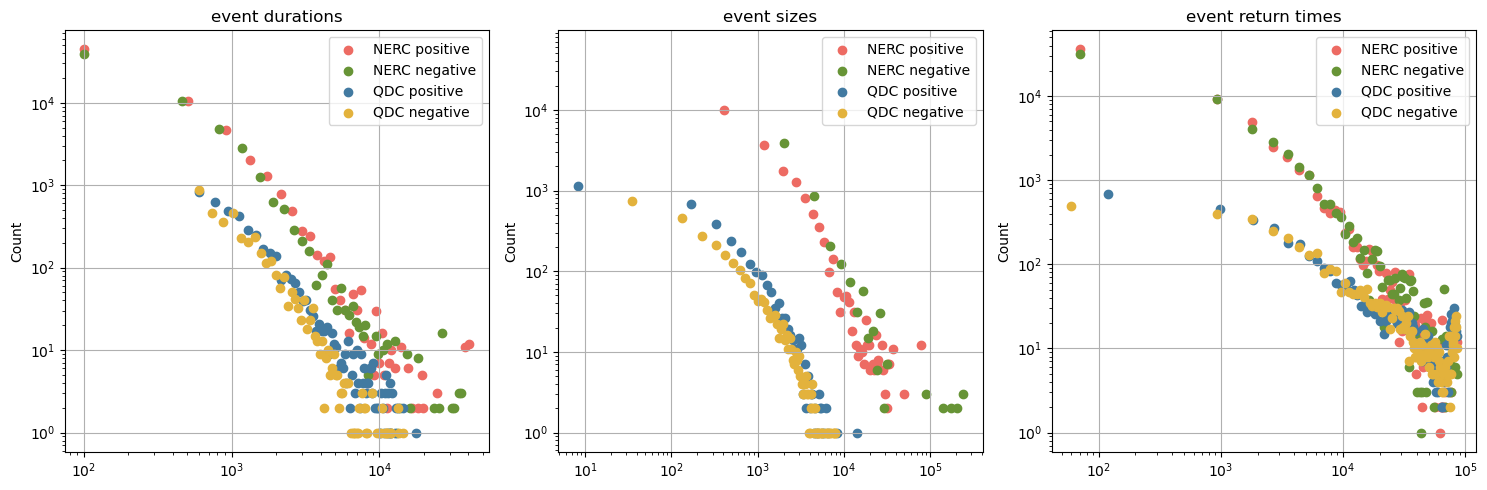

In [18]:

# Create a 3x1 grid of subplots using gridspec
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 3, )#height_ratios=[1, 1, 1])

labels=['event durations','event sizes','event return times']
# Plot PDFs in each subplot
for i, data_label in enumerate(['event_durations','event_sizes','event_betweendistances']):
    
    for d in ['NERC positive','NERC negative','QDC positive','QDC negative']:
        
        if d == 'NERC positive':
            data = df_GIC_total_NERC_positive[data_label]
            c_plot = '#ED6B63'
        elif d == 'NERC negative':
            data = df_GIC_total_NERC_negative[data_label]
            c_plot = '#679436'
        elif d == 'QDC positive':
            data = df_GIC_total_QDC_positive[data_label]
            c_plot = '#427AA1'
        elif d == 'QDC negative':
            data = df_GIC_total_QDC_negative[data_label]
            c_plot = '#E3B23C'

        
        filtered_data = data[~np.isnan(data)]
        hist_values, bin_edges = np.histogram(filtered_data, bins=100)  # Adjust the number of bins as needed


        # Create a scatter plot of histogram values
        ax = plt.subplot(gs[i])
        plt.scatter(bin_edges[:-1], hist_values, marker='o', color=c_plot, label=d)


    ax.set_title(labels[i])
#     ax.set_xlim([100,100000])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('Count')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()



### Fitting curves to the bursts distributions

In [142]:
from scipy.optimize import curve_fit

# Define the power-law function
def power_law(x, a, b):
    return a * (x**b)

def get_fit_params(data,n_bins,first_val,last_val):
    
    '''
     first_val and last_val are the indices of the histogram data to include in the fit
    
    '''

    filtered_data = data[~np.isnan(data)]
    hist_values, bin_edges = np.histogram(filtered_data, bins=100)  # Adjust the number of bins as needed
    y_data = hist_values[first_val:last_val]
    x_data = bin_edges[first_val:last_val-1]
    params, covariance = curve_fit(power_law, x_data, y_data)

    # Extract the fitted parameters
    a_fit, b_fit = params

    # Generate y values based on the fitted model
    y_fit = power_law(x_data, a_fit, b_fit)
    
    return hist_values, bin_edges, a_fit, b_fit, x_data, y_fit

    
def get_fit_params_size_duration(x_data,y_data):
    
    '''
     first_val and last_val are the indices of the histogram data to include in the fit
    
    '''
#     mask = [~np.isnan(y_data) & ~np.isnan(x_data)]
    mask = np.where(~np.isnan(x_data) & ~np.isnan(y_data))[0]
    y_data = y_data[mask]
#     y_data.values[y_data.values<1e-3] = 1e-3
    x_data = x_data[mask]
    params, covariance = curve_fit(power_law, x_data, y_data)

    # Extract the fitted parameters
    a_fit, b_fit = params

    # Generate y values based on the fitted model
    y_fit = power_law(x_data, a_fit, b_fit)
    
    return a_fit, b_fit, x_data, y_fit

    

    
    

/var/folders/56/vhtxcmr565z5ksdt3g3px27w0000gq/T/ipykernel_69440/2259830494.py:5: RuntimeWarning: invalid value encountered in power
  return a * (x**b)


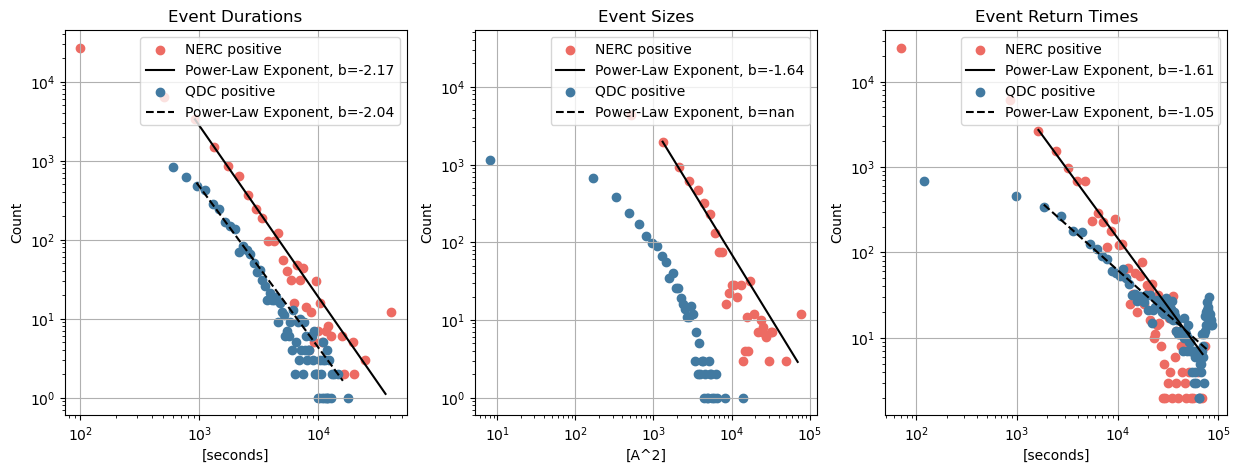

In [65]:
# Create a 3x1 grid of subplots using gridspec
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 3, )#height_ratios=[1, 1, 1])


# Event durations
n_bins = 100
first_val = 2
last_val = -10#n_bins
ax = plt.subplot(gs[0])


data_NERCpos = df_GIC_total_NERC_positive['event_durations'].values
hist_values, bin_edges, a_fit, b_fit, x_data, y_fit = get_fit_params(data_NERCpos,n_bins,first_val,last_val)
plt.scatter(bin_edges[:-1], hist_values, label='NERC positive', color='#ED6B63')
plt.plot(x_data, y_fit, label=f'Power-Law Exponent, b={b_fit:.2f}', color='k')
# plt.plot(x_data, y_fit, label=f'Power-Law Fit: a={a_fit:.2f}, b={b_fit:.2f}', color='k')


data_QDCpos = df_GIC_total_QDC_positive['event_durations'].values
hist_values, bin_edges, a_fit, b_fit, x_data, y_fit = get_fit_params(data_QDCpos,n_bins,first_val,last_val)
plt.scatter(bin_edges[:-1], hist_values, label='QDC positive', color='#427AA1')
plt.plot(x_data, y_fit, label=f'Power-Law Exponent, b={b_fit:.2f}', color='k',linestyle='--')
# plt.plot(x_data, y_fit, label=f'Power-Law Fit: a={a_fit:.2e}, b={b_fit:.2f}', color='k',linestyle='--')


plt.xscale('log')
plt.yscale('log')

plt.xlabel('[seconds]')
plt.ylabel('Count')

plt.title('Event Durations')
plt.legend()
plt.grid(True)




# Event sizes
n_bins = 100
first_val = 2
last_val = -10#n_bins
ax = plt.subplot(gs[1])


data_NERCpos = df_GIC_total_NERC_positive['event_sizes'].values
hist_values, bin_edges, a_fit, b_fit, x_data, y_fit = get_fit_params(data_NERCpos,n_bins,first_val,last_val)
plt.scatter(bin_edges[:-1], hist_values, label='NERC positive', color='#ED6B63')
plt.plot(x_data, y_fit, label=f'Power-Law Exponent, b={b_fit:.2f}', color='k')
# plt.plot(x_data, y_fit, label=f'Power-Law Fit: a={a_fit:.2f}, b={b_fit:.2f}', color='k')


data_QDCpos = df_GIC_total_QDC_positive['event_sizes'].values
hist_values, bin_edges, a_fit, b_fit, x_data, y_fit = get_fit_params(data_QDCpos,n_bins,first_val,last_val)
plt.scatter(bin_edges[:-1], hist_values, label='QDC positive', color='#427AA1')
plt.plot(x_data, y_fit, label=f'Power-Law Exponent, b={b_fit:.2f}', color='k',linestyle='--')
# plt.plot(x_data, y_fit, label=f'Power-Law Fit: a={a_fit:.2e}, b={b_fit:.2f}', color='k',linestyle='--')


plt.xscale('log')
plt.yscale('log')

plt.xlabel('[A^2]')
plt.ylabel('Count')

plt.title('Event Sizes')
plt.legend()
plt.grid(True)


# Event Return Times
n_bins = 100
first_val = 2
last_val = -10#n_bins
ax = plt.subplot(gs[2])


data_NERCpos = df_GIC_total_NERC_positive['event_betweendistances'].values
hist_values, bin_edges, a_fit, b_fit, x_data, y_fit = get_fit_params(data_NERCpos,n_bins,first_val,last_val)
plt.scatter(bin_edges[:-1], hist_values, label='NERC positive', color='#ED6B63')
plt.plot(x_data, y_fit, label=f'Power-Law Exponent, b={b_fit:.2f}', color='k')
# plt.plot(x_data, y_fit, label=f'Power-Law Fit: a={a_fit:.2f}, b={b_fit:.2f}', color='k')


data_QDCpos = df_GIC_total_QDC_positive['event_betweendistances'].values
hist_values, bin_edges, a_fit, b_fit, x_data, y_fit = get_fit_params(data_QDCpos,n_bins,first_val,last_val)
plt.scatter(bin_edges[:-1], hist_values, label='QDC positive', color='#427AA1')
plt.plot(x_data, y_fit, label=f'Power-Law Exponent, b={b_fit:.2f}', color='k',linestyle='--')
# plt.plot(x_data, y_fit, label=f'Power-Law Fit: a={a_fit:.2e}, b={b_fit:.2f}', color='k',linestyle='--')


plt.xscale('log')
plt.yscale('log')

plt.xlabel('[seconds]')
plt.ylabel('Count')

plt.title('Event Return Times')
plt.legend()
plt.grid(True)


plt.show()

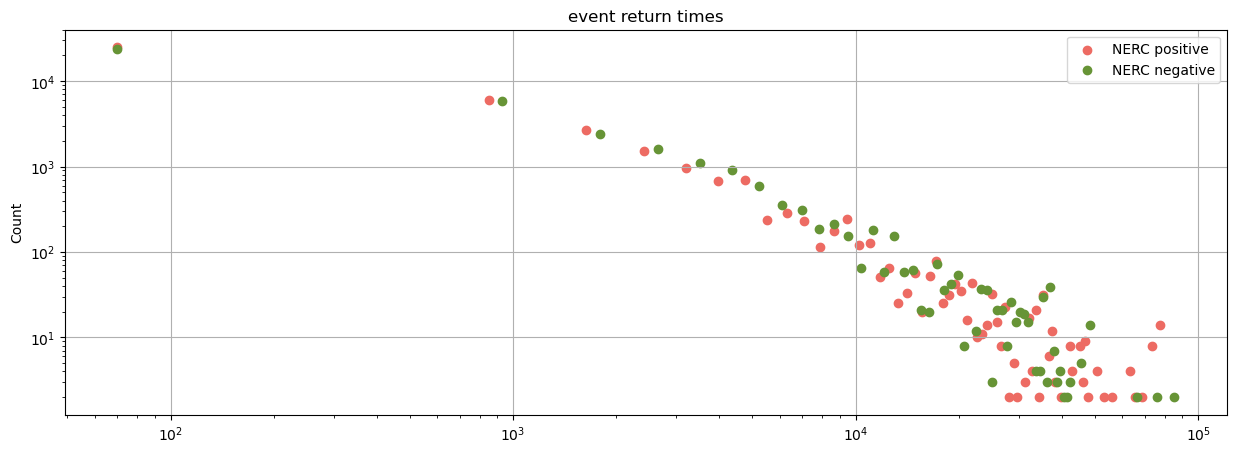

In [71]:
# Create a 3x1 grid of subplots using gridspec
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 1, )#height_ratios=[1, 1, 1])

labels=['event return times']
# Plot PDFs in each subplot
for i, data_label in enumerate(['event_betweendistances']):
    
    for d in ['NERC positive','NERC negative']:#,'QDC positive','QDC negative']:
        
        if d == 'NERC positive':
            data = df_GIC_total_NERC_positive[data_label]
            c_plot = '#ED6B63'
        elif d == 'NERC negative':
            data = df_GIC_total_NERC_negative[data_label]
            c_plot = '#679436'
        elif d == 'QDC positive':
            data = df_GIC_total_QDC_positive[data_label]
            c_plot = '#427AA1'
        elif d == 'QDC negative':
            data = df_GIC_total_QDC_negative[data_label]
            c_plot = '#E3B23C'

        
        filtered_data = data[~np.isnan(data)]
        hist_values, bin_edges = np.histogram(filtered_data, bins=100)  # Adjust the number of bins as needed


        # Create a scatter plot of histogram values
        ax = plt.subplot(gs[i])
        plt.scatter(bin_edges[:-1], hist_values, marker='o', color=c_plot, label=d)


    ax.set_title(labels[i])
#     ax.set_xlim([100,100000])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('Count')
    ax.grid(True)
    ax.legend()

### Duration vs Size

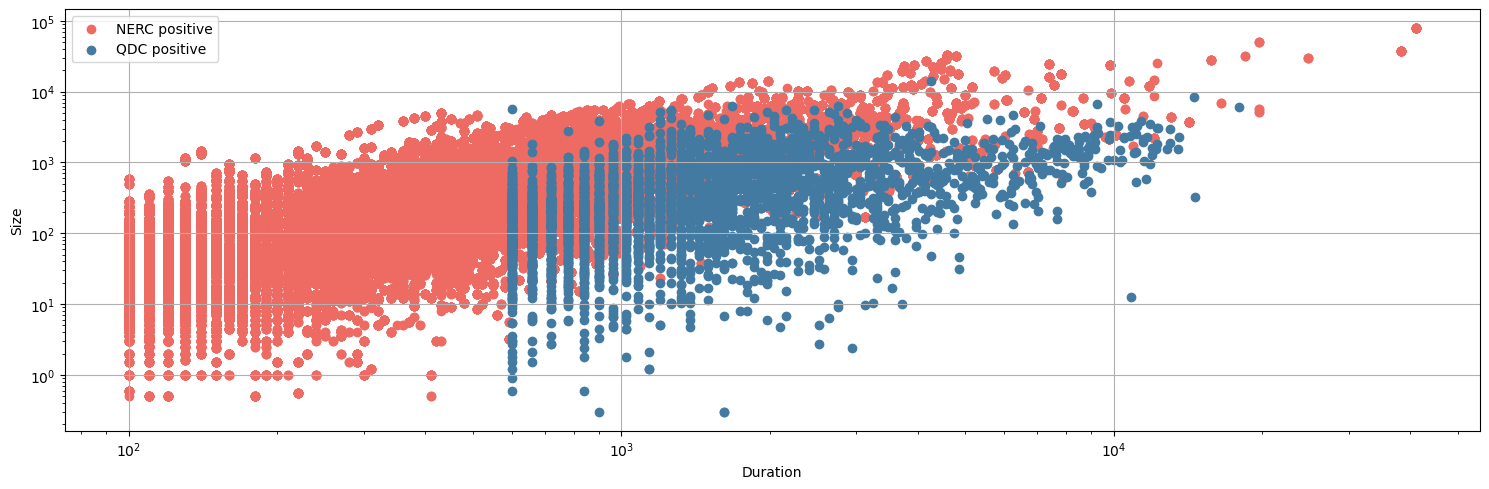

In [11]:

# Create a 3x1 grid of subplots using gridspec
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 1, )#height_ratios=[1, 1, 1])

    
# for d in ['NERC positive','NERC negative','QDC positive','QDC negative']:
for d in ['NERC positive', 'QDC positive']:

    if d == 'NERC positive':
        data_size = df_GIC_total_NERC_positive['event_sizes']
        data_size.values[data_size.values<1e-3] = np.nan
        data_duration = df_GIC_total_NERC_positive['event_durations']
        c_plot = '#ED6B63'
    elif d == 'NERC negative':
        data_size = df_GIC_total_NERC_negative['event_sizes']
        data_size.values[data_size.values<1e-3] = np.nan
        data_duration = df_GIC_total_NERC_negative['event_durations']
        c_plot = '#679436'
    elif d == 'QDC positive':
        data_size = df_GIC_total_QDC_positive['event_sizes']
        data_size.values[data_size.values<1e-3] = np.nan
        data_duration = df_GIC_total_QDC_positive['event_durations']
        c_plot = '#427AA1'
    elif d == 'QDC negative':
        data_size = df_GIC_total_QDC_negative['event_sizes']
        data_size.values[data_size.values<1e-3] = np.nan
        data_duration = df_GIC_total_QDC_negative['event_durations']
        c_plot = '#E3B23C'

    # Create a scatter plot of histogram values
    ax = plt.subplot(gs[0])
    plt.scatter(data_duration, data_size, marker='o', color=c_plot, label=d)
    
#     a_fit, b_fit, x_data, y_fit = get_fit_params_size_duration(data_size.values,data_duration.values)
#     plt.plot(x_data, y_fit, label=f'Power-Law Exponent, b={b_fit:.2f}', color='k')



#     ax.set_xlim([100,100000])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('Size')
    ax.set_xlabel('Duration')
    ax.grid(True)
    ax.legend()

# plt.ylim([1e-3,1e6])
plt.tight_layout()
plt.show()



In [146]:
a_fit, b_fit, x_data, y_fit = get_fit_params_size_duration(data_size.values,data_duration.values)

In [126]:
mask = [~np.isnan(data_size.values) & ~np.isnan(data_duration.values)]


In [28]:
df_GIC_total_NERC_positive

,event_start_idxs,event_end_idxs,event_start_times,event_end_times,event_sizes,event_durations,event_betweendistances,event id,sensor id
0,8186,8271,2015-09-19 22:44:20,2015-09-19 22:58:30,58.0,850,NaN,event_20150919,10188
1,8284,8305,2015-09-19 23:00:40,2015-09-19 23:04:10,22.0,210,130.0,event_20150919,10188
2,8318,8347,2015-09-19 23:06:20,2015-09-19 23:11:10,6.0,290,130.0,event_20150919,10188
3,8362,8392,2015-09-19 23:13:40,2015-09-19 23:18:40,15.0,300,150.0,event_20150919,10188
4,8404,8493,2015-09-19 23:20:40,2015-09-19 23:35:30,118.0,890,120.0,event_20150919,10188
...,...,...,...,...,...,...,...,...,...
6,4194,4204,2015-09-11 11:39:00,2015-09-11 11:40:40,9.0,100,490.0,event_20150911,10252
7,4265,4372,2015-09-11 11:50:50,2015-09-11 12:08:40,159.0,1070,610.0,event_20150911,10252
8,4397,5606,2015-09-11 12:12:50,2015-09-11 15:34:20,8817.0,12090,250.0,event_20150911,10252
9,5943,6022,2015-09-11 16:30:30,2015-09-11 16:43:40,98.0,790,3370.0,event_20150911,10252


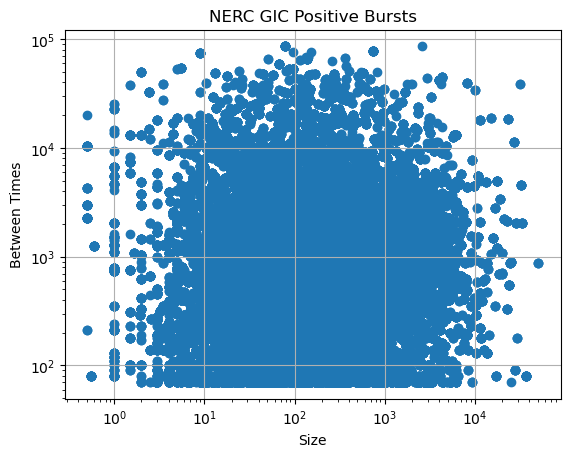

In [33]:

data_size = df_GIC_total_NERC_positive['event_sizes']
data_size.values[data_size.values<1e-3] = np.nan
data_duration = df_GIC_total_NERC_positive['event_durations']
data_betweendistance = df_GIC_total_NERC_positive['event_betweendistances']

c_plot = '#ED6B63'

# plt.scatter(data_size[~np.isnan(data_size) & ~np.isnan(data_duration)],
#             data_duration[~np.isnan(data_size) & ~np.isnan(data_duration)])
plt.scatter(data_size[~np.isnan(data_size) & ~np.isnan(data_betweendistance)],
            data_betweendistance[~np.isnan(data_size) & ~np.isnan(data_betweendistance)].values,)
# plt.scatter(data_duration[~np.isnan(data_duration) & ~np.isnan(data_betweendistance)].values,
#             data_betweendistance[~np.isnan(data_duration) & ~np.isnan(data_betweendistance)].values,)
plt.xscale('log')
plt.yscale('log')
# plt.xlabel('Size')
# plt.ylabel('Duration')
plt.xlabel('Size')
plt.ylabel('Between Times')
# plt.xlabel('Duration')
# plt.ylabel('Between Times')
plt.title('NERC GIC Positive Bursts')
plt.grid(True)


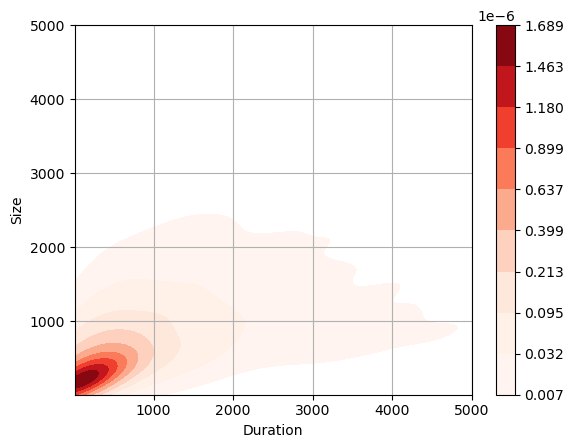

In [27]:
sns.kdeplot(x=data_size[~np.isnan(data_size) & ~np.isnan(data_duration)].values,
            y=data_duration[~np.isnan(data_size) & ~np.isnan(data_duration)].values, 
            cmap="Reds", 
            fill=True,
            clip=[10,5000],
            cbar=True)

# plt.xscale('log')
# plt.yscale('log')
plt.ylabel('Size')
plt.xlabel('Duration')
plt.grid(True)
plt.show()

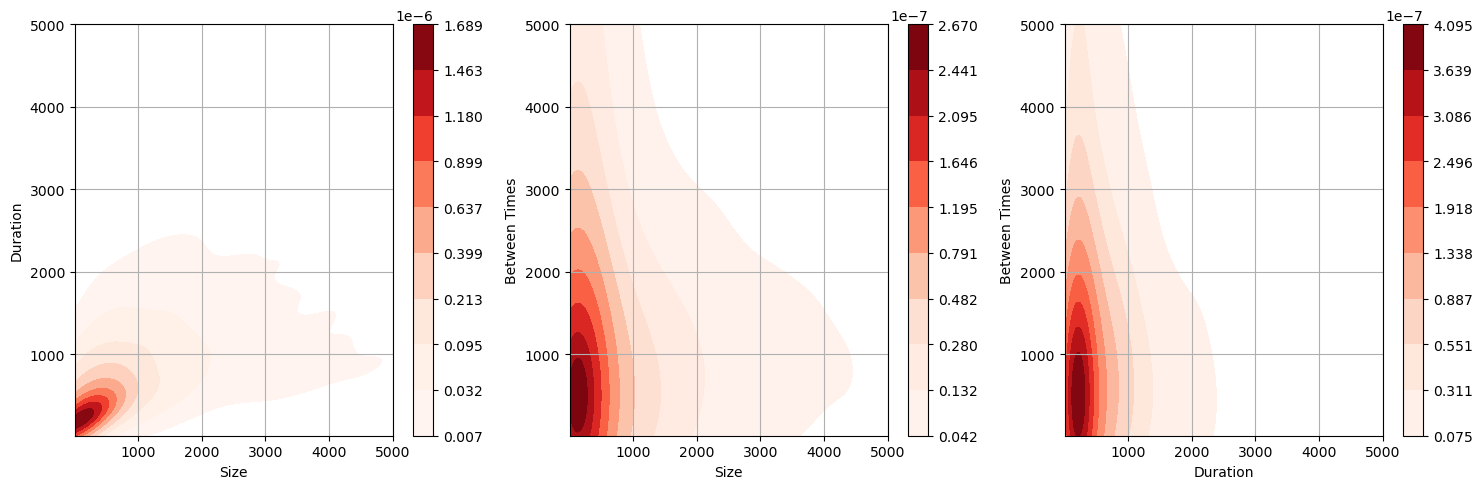

In [50]:

# Create a 3x1 grid of subplots using gridspec
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 3, )#height_ratios=[1, 1, 1])

data_size = df_GIC_total_NERC_positive['event_sizes']
data_size.values[data_size.values<1e-3] = np.nan
data_duration = df_GIC_total_NERC_positive['event_durations']
data_betweendistance = df_GIC_total_NERC_positive['event_betweendistances']

# Burst Size vs Duration
ax = plt.subplot(gs[0])
sns.kdeplot(x=data_size[~np.isnan(data_size) & ~np.isnan(data_duration)].values,
            y=data_duration[~np.isnan(data_size) & ~np.isnan(data_duration)].values, 
            cmap="Reds", 
            fill=True,
            clip=[10,5000],
            cbar=True)

plt.xlabel('Size')
plt.ylabel('Duration')
plt.grid(True)

ax = plt.subplot(gs[1])
sns.kdeplot(x=data_size[~np.isnan(data_size) & ~np.isnan(data_betweendistances)].values,
            y=data_betweendistance[~np.isnan(data_size) & ~np.isnan(data_betweendistance)].values, 
            cmap="Reds", 
            fill=True,
            clip=[10,5000],
            cbar=True)

plt.xlabel('Size')
plt.ylabel('Between Times')
plt.grid(True)

ax = plt.subplot(gs[2])
sns.kdeplot(x=data_duration[~np.isnan(data_duration) & ~np.isnan(data_betweendistance)].values,
            y=data_betweendistance[~np.isnan(data_duration) & ~np.isnan(data_betweendistance)].values, 
            cmap="Reds", 
            fill=True,
            clip=[10,5000],
            cbar=True)

plt.xlabel('Duration')
plt.ylabel('Between Times')
plt.grid(True)

plt.tight_layout()
plt.show()



In [49]:
( pd.to_datetime('2015-09-20 04:01:50') - pd.to_datetime('2015-09-20 00:52:10') ).total_seconds()

11380.0

### AE and IMF distributions

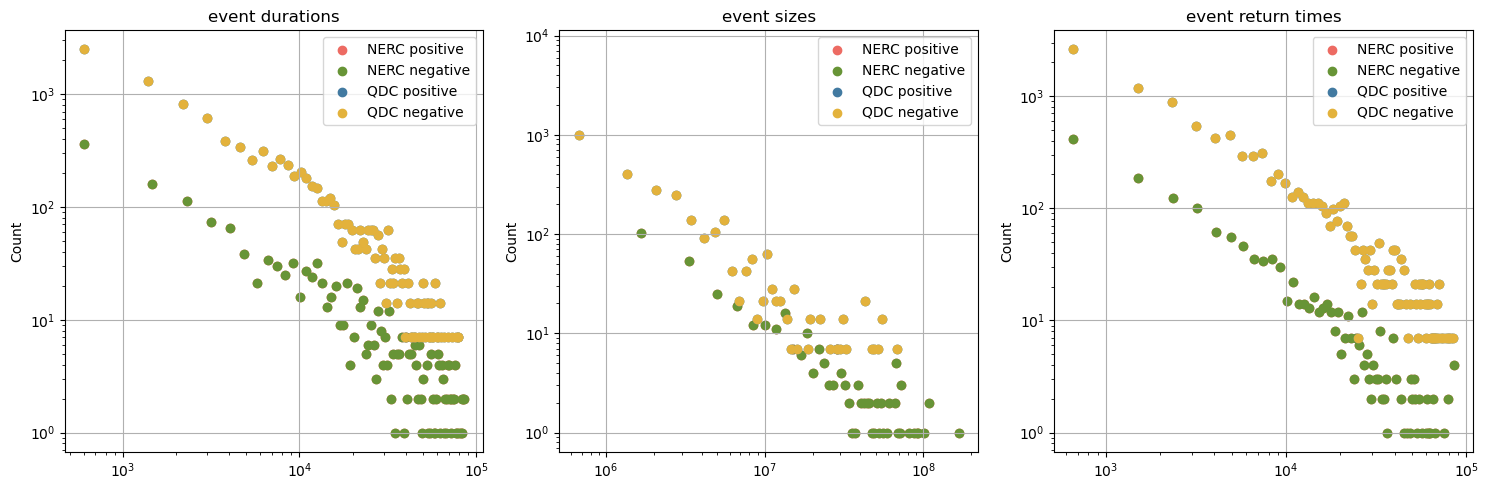

In [152]:
# Plot the AE event bursts distributions


# Create a 3x1 grid of subplots using gridspec
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 3, )#height_ratios=[1, 1, 1])

labels=['event durations','event sizes','event return times']
# Plot PDFs in each subplot
for i, data_label in enumerate(['event_durations','event_sizes','event_betweendistances']):
    
    for d in ['NERC positive','NERC negative','QDC positive','QDC negative']:
        
        if d == 'NERC positive':
            data = df_AE_total_NERC_positive[data_label]
            c_plot = '#ED6B63'
        elif d == 'NERC negative':
            data = df_AE_total_NERC_negative[data_label]
            c_plot = '#679436'
        elif d == 'QDC positive':
            data = df_AE_total_QDC_positive[data_label]
            c_plot = '#427AA1'
        elif d == 'QDC negative':
            data = df_AE_total_QDC_negative[data_label]
            c_plot = '#E3B23C'

        data = data.astype(float)
        filtered_data = data[~np.isnan(data)]
        hist_values, bin_edges = np.histogram(filtered_data, bins=100)  # Adjust the number of bins as needed


        # Create a scatter plot of histogram values
        ax = plt.subplot(gs[i])
        plt.scatter(bin_edges[:-1], hist_values, marker='o', color=c_plot, label=d)


    ax.set_title(labels[i])
#     ax.set_xlim([100,100000])
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('Count')
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()



In [20]:
df_GIC_total_NERC_positive

,event_start_idxs,event_end_idxs,event_start_times,event_end_times,event_sizes,event_durations,event_betweendistances,event id,sensor id
0,8186,8271,2015-09-19 22:44:20,2015-09-19 22:58:30,58.0,850,NaN,event_20150919,10188
1,8284,8305,2015-09-19 23:00:40,2015-09-19 23:04:10,22.0,210,130.0,event_20150919,10188
2,8318,8347,2015-09-19 23:06:20,2015-09-19 23:11:10,6.0,290,130.0,event_20150919,10188
3,8362,8392,2015-09-19 23:13:40,2015-09-19 23:18:40,15.0,300,150.0,event_20150919,10188
4,8404,8493,2015-09-19 23:20:40,2015-09-19 23:35:30,118.0,890,120.0,event_20150919,10188
...,...,...,...,...,...,...,...,...,...
6,4194,4204,2015-09-11 11:39:00,2015-09-11 11:40:40,9.0,100,490.0,event_20150911,10252
7,4265,4372,2015-09-11 11:50:50,2015-09-11 12:08:40,159.0,1070,610.0,event_20150911,10252
8,4397,5606,2015-09-11 12:12:50,2015-09-11 15:34:20,8817.0,12090,250.0,event_20150911,10252
9,5943,6022,2015-09-11 16:30:30,2015-09-11 16:43:40,98.0,790,3370.0,event_20150911,10252


### Bootstrapping method

In [38]:

# Function to compute histogram
def compute_histogram_bootstrap(data,bin_edges,num_bootstrap_samples):
    histogram, _ = np.histogram(data, bins=bin_edges)#, density=True)
    
    # Perform bootstrap resampling
    bootstrap_histograms = []
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = np.random.choice(values, size=int(np.floor(len(values)/2)), replace=True)
        histogram, _ = compute_histogram(bootstrap_sample,bin_edges)
        bootstrap_histograms.append(histogram)

    # Compute uncertainty estimates
    mean_histogram = np.mean(bootstrap_histograms, axis=0)
    std_histogram = np.std(bootstrap_histograms, axis=0)


    return bootstrap_histograms, mean_histogram, std_histogram



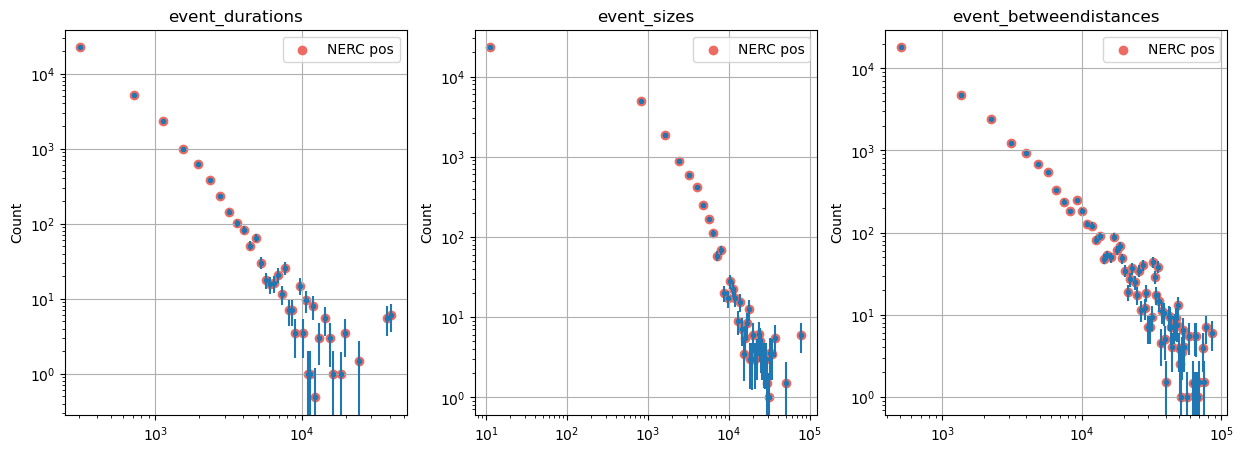

In [45]:
# Number of bootstrap samples
num_bootstrap_samples = 10000

# Create a 3x1 grid of subplots using gridspec
fig = plt.figure(figsize=(15,5))
gs = gridspec.GridSpec(1, 3, )#height_ratios=[1, 1, 1])
c_plot = '#ED6B63'

labels=['event durations','event sizes','event return times']
# Plot PDFs in each subplot
for i, data_label in enumerate(['event_durations','event_sizes','event_betweendistances']):
    values = df_GIC_total_NERC_positive[data_label].values
    values = values[~np.isnan(values)]

    
    # Define bin edges
    bin_edges = np.linspace(min(values),max(values), 100)

    # compute histogram bootstrap estimates
    bootstrap_histograms, mean_histogram, std_histogram = compute_histogram_bootstrap(values,bin_edges,num_bootstrap_samples)
    
    ax = plt.subplot(gs[i])
    plt.scatter(bin_edges[:-1] + np.diff(bin_edges) / 2, mean_histogram, marker='o', color=c_plot, label='NERC pos')
    plt.errorbar(bin_edges[:-1] + np.diff(bin_edges) / 2, mean_histogram,yerr=std_histogram, fmt=".")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylabel('Count')
    ax.set_title(data_label)
    ax.grid(True)
    ax.legend()
#     plt.show()
    




In [42]:
values

array([  nan,  130.,  130., ...,  250., 3370.,  240.])

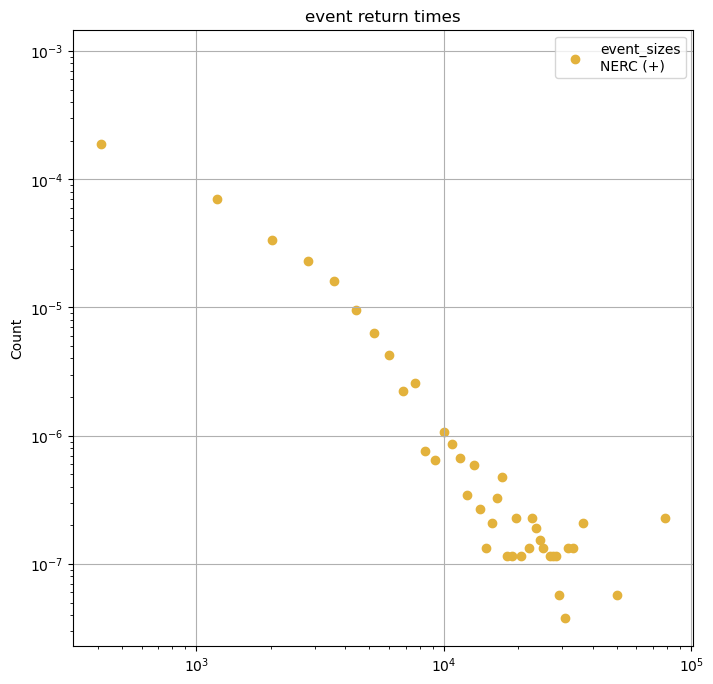

In [23]:
bin_edges
histogram, _ = np.histogram(values, bins=bin_edges, density=True)
# Create a 3x1 grid of subplots using gridspec
fig = plt.figure(figsize=(8,8))
gs = gridspec.GridSpec(1, 1, )#height_ratios=[1, 1, 1])

# Create a scatter plot of histogram values
ax = plt.subplot(gs[0])
plt.scatter(bin_edges[:-1], histogram, marker='o', color=c_plot, label=statistic+'\nNERC (+)')


ax.set_title(labels[i])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.grid(True)
ax.legend()